In [12]:
from dotenv import load_dotenv
from datetime import datetime
import os
import requests
import pandas as pd
import seaborn as sns
from alpaca_trade_api.rest import REST, TimeFrame
from MCForecastTools import MCSimulation


In [13]:
load_dotenv()
api_key=os.getenv("ALPACA_API_KEY")
api_secret_key=os.getenv("ALPACA_SECRET_KEY")

In [14]:
tickers = ["SPY","LUV","DIS","AAPL","SBUX","WORK"]
api = REST(api_key , api_secret_key, api_version='v2')
yearly = api.get_bars(tickers, TimeFrame.Day, "2021-03-20", "2022-03-21", adjustment='raw').df

In [15]:

yearly.index=yearly.index.date
yearly=yearly[['close', 'symbol']]
table = pd.pivot_table(yearly, values='close', index=yearly.index, columns=['symbol'])


yearly

,close,symbol
2021-03-22,123.39,AAPL
2021-03-23,122.54,AAPL
2021-03-24,120.09,AAPL
2021-03-25,120.59,AAPL
2021-03-26,121.21,AAPL
...,...,...
2021-07-14,44.00,WORK
2021-07-15,44.57,WORK
2021-07-16,44.70,WORK
2021-07-19,45.16,WORK


In [16]:
table

symbol,AAPL,DIS,LUV,SBUX,SPY,WORK
2021-03-22,123.39,192.86,59.46,107.57,392.59,40.80
2021-03-23,122.54,188.73,57.62,106.25,389.50,40.97
2021-03-24,120.09,184.72,57.70,104.97,387.52,40.45
2021-03-25,120.59,186.91,59.91,107.35,389.70,40.05
2021-03-26,121.21,185.92,61.29,109.90,395.98,40.37
...,...,...,...,...,...,...
2022-03-15,155.09,134.20,42.06,83.12,426.17,NaN
2022-03-16,159.59,138.14,43.12,87.41,435.55,NaN
2022-03-17,160.62,139.47,42.78,87.66,441.07,NaN
2022-03-18,163.98,140.30,43.24,89.60,444.31,NaN


In [19]:
table_pct_change = table.pct_change()
table_pct_change.dropna(inplace=True) 
table_pct_change

symbol,AAPL,DIS,LUV,SBUX,SPY,WORK
2021-03-23,-0.006889,-0.021414,-0.030945,-0.012271,-0.007871,0.004167
2021-03-24,-0.019993,-0.021247,0.001388,-0.012047,-0.005083,-0.012692
2021-03-25,0.004164,0.011856,0.038302,0.022673,0.005626,-0.009889
2021-03-26,0.005141,-0.005297,0.023035,0.023754,0.016115,0.007990
2021-03-29,0.001485,-0.005755,-0.005384,-0.007006,-0.000505,0.005202
...,...,...,...,...,...,...
2022-03-15,0.029677,0.040068,0.048878,0.048304,0.021990,0.000000
2022-03-16,0.029015,0.029359,0.025202,0.051612,0.022010,0.000000
2022-03-17,0.006454,0.009628,-0.007885,0.002860,0.012674,0.000000
2022-03-18,0.020919,0.005951,0.010753,0.022131,0.007346,0.000000


<AxesSubplot:ylabel='Frequency'>

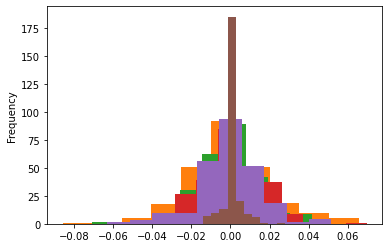

In [22]:
table_pct_change["SPY"].plot.hist()
table_pct_change["LUV"].plot.hist()
table_pct_change["DIS"].plot.hist()
table_pct_change["AAPL"].plot.hist()
table_pct_change["SBUX"].plot.hist()
table_pct_change["WORK"].plot.hist()

<AxesSubplot:ylabel='Density'>

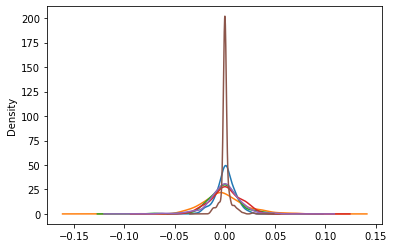

In [23]:
table_pct_change["SPY"].plot.density()
table_pct_change["LUV"].plot.density()
table_pct_change["DIS"].plot.density()
table_pct_change["AAPL"].plot.density()
table_pct_change["SBUX"].plot.density()
table_pct_change["WORK"].plot.density()

/Users/satishsurath/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/satishsurath/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/satishsurath/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code

<AxesSubplot:xlabel='WORK', ylabel='Density'>

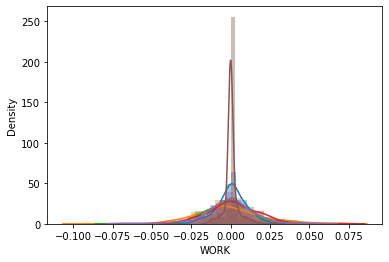

In [25]:
sns.distplot(table_pct_change['SPY'])
sns.distplot(table_pct_change['LUV'])
sns.distplot(table_pct_change['DIS'])
sns.distplot(table_pct_change['AAPL'])
sns.distplot(table_pct_change['SBUX'])
sns.distplot(table_pct_change['WORK'])

In [26]:
def get_data(ticker):
    api = REST(api_key , api_secret_key, api_version='v2')
    yearly = api.get_bars(ticker, TimeFrame.Day, "2021-03-20", "2022-03-21", adjustment='raw').df
    yearly.index=yearly.index.date
    yearly=yearly[['close']]
    return yearly


In [27]:
df = get_data("MSFT")

In [31]:
initial_price = df.iloc[0].values[0]
initial_price

235.99

In [32]:
pct_changes = df.pct_change()
pct_changes.dropna(inplace=True)
pct_changes.index = pd.to_datetime(pct_changes.index) 
possible_changes = list(pct_changes
pct_changes

,close
2021-03-23,0.006738
2021-03-24,-0.008923
2021-03-25,-0.013251
2021-03-26,0.017819
2021-03-29,-0.005244
...,...
2022-03-15,0.038743
2022-03-16,0.025213
2022-03-17,0.002819
2022-03-18,0.017648
